# 1. Introduction

In this google colab, we'll be applying our accumulated knowledge on the techniques of supervised learning algorithms. The task to be adressed for this milestone is the prediction of damage levels to buildings caused by the 2015 Gorkha earthquake in Nepal. Further information on the task is retrievable from the competition page by **drivendata.org**: "[Richter's Predictor: Modeling Earthquake Damage](https://www.drivendata.org/competitions/57/nepal-earthquake/)".

The authors of this project are:

- [Raúl Barba Rojas](Raul.Barba@alu.uclm.es)
- [Diego Guerrero Del Pozo](Diego.Guerrero@alu.uclm.es)
- [Marvin Schmidt](Marvin.Schmidt@alu.uclm.es)

# 2. Preparations

### 2.1 Importing libraries

In [ ]:
%matplotlib inline

from google.colab import output # only used for console print clearing (output.clear())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 2.2 Importing training data

All the datasets from the DrivenData competition can be accessed in this github repository.

In this section, we simply load the three different datasets as pandas dataframes, so that we can work with them to achieve the desired results.

---

There are two different csv files related to the training dataset:

1. `train_values.csv`: this file contains the values of the different features with which the training will be performed.
2. `train_labels.csv `: this file contains the values of the labels for the output feature that we are trying to predict, which is called `damage_grade`.

Thus, we first need to download the datasets from the github repository and we need to load them as dataframes:

In [ ]:
# import train_values.csv
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_values.csv
df_train_values= pd.read_csv("train_values.csv", index_col = "building_id")
df_train_values.head()

--2022-11-27 11:43:06--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_values.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_values.csv [following]
--2022-11-27 11:43:07--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_values.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23442727 (22M) [text/plain]
Saving to: ‘train_values.csv’

train_values.csv    100%[===================>]  22.36M   110MB/s    in 0.2s    

2022-11-27 11:43:08 (110 MB/s) - ‘train_values.csv’ saved [234427

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# import train_labels.csv
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_labels.csv
df_train_labels = pd.read_csv("train_labels.csv", index_col = "building_id")
df_train_labels.head()

--2022-11-27 11:43:10--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_labels.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_labels.csv [following]
--2022-11-27 11:43:11--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2330792 (2.2M) [text/plain]
Saving to: ‘train_labels.csv’

train_labels.csv    100%[===================>]   2.22M  --.-KB/s    in 0.07s   

2022-11-27 11:43:11 (31.6 MB/s) - ‘train_labels.csv’ saved [2330792

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


Once we have loaded both datasets we need to join them, obtaining the complete training dataset:

In [ ]:
df_train_values.join(df_train_labels).to_csv("train_full.csv")

## 2.3 Importing testing data

In order to be able to evaluate our findings, we'll also need the testing data, as well as the template for the submission file. These datasets can also be accessed from this github repository.

1. `test_values.csv`: this file contains the values of the different features with which the testing will be performed.
2. `submission_format.csv`: this file contains "empty" labels for all the buildings we're trying to predict the damage grade for. It's a template file to be modified later, in which every label for ``damage_grade`` is ``1``.

In [ ]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/test_values.csv
test_values = pd.read_csv('test_values.csv', index_col='building_id')

!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/submission_format.csv
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')

--2022-11-27 11:43:17--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/test_values.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/test_values.csv [following]
--2022-11-27 11:43:17--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/test_values.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7815385 (7.5M) [text/plain]
Saving to: ‘test_values.csv’

test_values.csv     100%[===================>]   7.45M  --.-KB/s    in 0.09s   

2022-11-27 11:43:17 (84.3 MB/s) - ‘test_values.csv’ saved [7815385/7815

# 3. Exploratory data analysis

Once we loaded the data, it is always good perform an exploratory data analysis to extract some initial conclusions that could guide the development of this project.

First of all, we can take a look at the dimensionality of the dataset:

In [ ]:
df_train_values.shape

(260601, 38)

As we can see, the dataset that we have to work with contains 38 features, without including the output feature that we need to predict. This already gives us valuable information, as we must perform a feature selection to improve the performance of the supervised learning algorithm.

On the other hand, we also can take a look at the types of the different variables:


In [ ]:
df_train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

We can already see that we have multiple different variables, some of which are categorical (nominal or maybe binary from 0 to 1) and some others are integer variables. This information is again useful for the application of supervised learning algorithms (e.g. Naive Bayes uses this information to use the model that achieves the best results).

Moreover, we can take a look at the distribution of the labels for the training dataset:


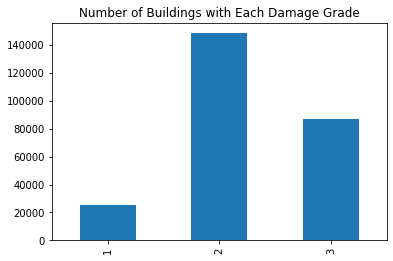

In [ ]:
(df_train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

As we can see, we have clearly unbalanced data, as there are few buildings with damage grade 1, some more buildings with damage grade 3, but mainly we have buildings with damage grade 2 (which is in between both of them).

Therefore, the fact that we have unbalanced data must be taken into account when applying the supervised learning algorithms.


We can also apply OneHotEncoding as a technique to deal with the categorical variables, so as to normalize them:

In [ ]:
df_train_values_complete = pd.get_dummies(df_train_values)
df_train_values_complete.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


We can see how the technique allowed us to normalize those variables, at the cost of including many more features (68 in total).

# 4. Feature Selection

There are multiple options to perform feature selection, we can use domain knowledge, we can also use hierarchical clustering or even a combination of both of them.

We decided to select the following features:

In [ ]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

df_train_values_subset = df_train_values[selected_features]
df_train_values_subset = pd.get_dummies(df_train_values)
df_train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
669485,17,715,2060,2,0,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
602512,17,51,8163,3,55,6,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0


As we can see, we selected several features, but most of them are binary features. This is because the initial dataset already contains lots of binary features, and also because they look pretty useful in order to create the input dataset for the supervised learning algorithms. <br> <br>

Let's also divide the training dataset into two subdataset one for really training the model and another one for testing the predicted labels against the real labels, to understand the performance of the model. Thus, we obtain 4 different variables: 

1. `X_train`: to train the model with the values from different features (coming from the initial training dataset).

2. `X_test`: to test the prediction of the model using its values as the values of the features (that it will use for the prediction).

3. `Y_train`: includes the labels related to `X_train` (they will be used for training the model).

4. `Y_test`: includes the labels related to `Y_test` (they will be used for testing the model).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_train_values_subset, df_train_labels.damage_grade, random_state=1)

# 5. Supervised Learning (Baseline)

In this section we apply the different supervised learning algorithms so as to obtain the baseline, that will be iteratively and incrementally improved by tuning the algorithms (or the input dataset through, for instance, feature selection).

## 5.1 Naive Bayes

The first supervised learning algorithm that we use in Naive Bayes. It will be the first algorithm to execute, so we expect this result to be the initial baseline that will be improving in the future algorithms.

### 5.1.1 Parametrization

The only parametrization that can be performed in Naive Bayes is to determine which model to use based on the data we have. We have to remember that there are multiple models.

Since most of the variables are binary variables, we can try to use BernoulliNB as the initial model for our baseline:

### 5.1.2. Modeling

Now we have to apply the model specified previously (the only parameter in Naive Bayes is the "type" of the model to be used, depending on the data that we have).

In [ ]:
from sklearn.naive_bayes import ComplementNB # 1. choose model class

nb_model = ComplementNB()                       # 2. instantiate model
nb_model.fit(X_train, Y_train)                 # 3. fit model to data
Y_model = nb_model.predict(X_test) 

### 5.1.3. Pre-evaluation

Once we created a possible initial baseline, we have to check the obtained results, in order to do that, we have to evaluate the model using the test dataset that we obtained previously (`X_test` and `Y_test`).

In this case, we will use the F1-score (balances the precision and recall of the model):

In [ ]:
from sklearn.metrics import f1_score

f1_score(Y_test, Y_model, average='micro')

0.2648155822627435

As we can see, the f1-score is 0.26 which is a really bad value as it is pretty close to 0 (the quality of our classifier is pretty bad). Thus, we need to improve it. Let's compute the confusion matrix in order to see graphical results:

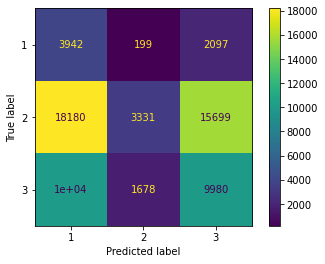

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_model, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot()

As we can see, this model gives lots of fails when predicting grades of damage of 1 and 3 when the grade damage of the building is in fact 2. 

### 5.1.4. Improving the results of Naive Bayes

In order to improve the results of Naive Bayes, we consider that there could be multiple points of improvement:

1. Perform a better data selection: which is pretty much the only way to tune the performance of the algorithm.

2. Select a more adequate model for the given data: in this case, most of our features are binary, it makes more sense to apply BernoulliNB which is better for those types of variables.

#### 5.1.4.1. Data selection improvements

In order to obtain better results, first of all we can perform a much smarter data selection (using domain knowledge still).

In this case, we decided to use the features that could really affect the damage degree of a building after an earthquake, such as the age of the building, the area/height percentage, the materials of the structure and the location where the earthquake happened, which could also influence some buildings being more or less damaged.

In [ ]:
selected_features = ['age',
                     'area_percentage',
                     'height_percentage',
                     'geo_level_1_id',
                     'geo_level_2_id',
                     'geo_level_3_id',
                     'has_superstructure_adobe_mud',
                     'has_superstructure_mud_mortar_stone',
                     'has_superstructure_stone_flag',
                     'has_superstructure_cement_mortar_stone',
                     'has_superstructure_mud_mortar_brick',
                     'has_superstructure_cement_mortar_brick',
                     'has_superstructure_timber',
                     'has_superstructure_bamboo',
                     'has_superstructure_rc_non_engineered',
                     'has_superstructure_rc_engineered',
                     'has_superstructure_other']

df_train_values_subset = df_train_values[selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(df_train_values_subset, df_train_labels.damage_grade, random_state=1)

In [ ]:
nb_model = ComplementNB()                      # 1. instantiate model
nb_model.fit(X_train, Y_train)                 # 2. fit model to data
Y_model = nb_model.predict(X_test) 

f1_score(Y_test, Y_model, average='micro')  # 3. Evaluate the model

0.2560513269174686

As we can see, the result is in fact pretty bad. However, this is not specifically because of the new features (which are better features than the original ones), it is because we are not using the model that should be used when we have binary variables (most of our features are binary), which is Bernouille. Let's try to improve the model and compare the results.

We can see the confusion matrix so understand graphically the results:

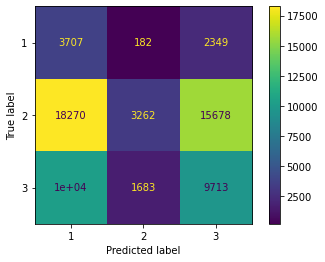

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_model, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot()

As we can see, the model still makes the same failures as the previous model (essentially fails to predict the eartquakes of type 2).

#### 5.1.4.2. Model improvements

Another way of improving the results is to use a more adequate model, such as BernoulliNB, because of the high amount of binary data. Let's calculate the results using that model:

In [ ]:
from sklearn.naive_bayes import BernoulliNB # 1. choose model class

nb_model = BernoulliNB()                       # 2. instantiate model
nb_model.fit(X_train, Y_train)                 # 3. fit model to data
Y_model = nb_model.predict(X_test) 

f1_score(Y_test, Y_model, average='micro')  # 4. Evaluate the model

0.5690165922242176

We can also draw the confusion matrix for this result:

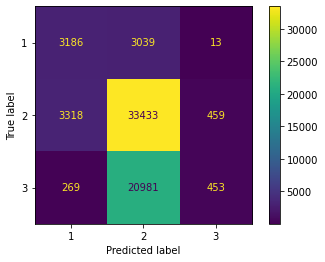

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_model, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot()

As we can see, although the model is giving really good results, the typical fails that it makes are related to predicting an eartquake as type 2 when it is actually type 3.

### 5.1.5 Preparing the submission

We will use our best model in order to get the highest possible rank when submitting the results of the model. Using the F1-score as a preliminary quality metric, we found that `BernoulliNB` using feature selection yielded the best results.

| **Model used** | **F1 Score obtained** |
|:--------------:|:-------------------:|
|   `ComplementNB`  |        0.2648       |
|   `ComplementNB` + feature selection  |        0.2560       |
|   `BernoulliNB` + feature selection  |        **0.5690**       |



In order to get the actual score from the competition, we'll be needing the test dataset and the submission template (see section 2.3). Since we performed a feature selection step, we also need to apply it to our test data before predicting the labels.

In [ ]:
# apply feature reduction
test_values_subset = test_values[selected_features]

# obtain the predictions
predictions = nb_model.predict(test_values_subset)

# create the submission file
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns, # only one column: 'damage_grade' 
                             index=submission_format.index)
my_submission.to_csv('nb_submission_baseline.csv')

The submitted file obtained a score of `0.5665`, ranked `#1561`.

Refer to section 5.4 for a comparison to the other baseline techniques.

## 5.2. KNN

After knowing how accurate Naive-Bayes can be, we can try a different algorithm to push even more the efficiency of the model: k nearest neighbors (KNN).

### 5.2.1. Preparations

For a proper preparation of the KNN model, we need a selection of features, which will be obtained with domain knowledge. In this case, we will use the same features as in Naive Bayes.

In this section, a splitting of the dataset will be used, to obtain values for training, and values for testing, in a proportion of 2/1, to prevent overfitting, and as experiments showed that 4/1 proportion yielded worse results.

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold

selected_features_knn = ['age',
                         'area_percentage',
                         'height_percentage',
                         'geo_level_1_id',
                         'geo_level_2_id',
                         'geo_level_3_id',
                         'has_superstructure_adobe_mud',
                         'has_superstructure_mud_mortar_stone',
                         'has_superstructure_stone_flag',
                         'has_superstructure_cement_mortar_stone',
                         'has_superstructure_mud_mortar_brick',
                         'has_superstructure_cement_mortar_brick',
                         'has_superstructure_timber',
                         'has_superstructure_bamboo',
                         'has_superstructure_rc_non_engineered',
                         'has_superstructure_rc_engineered',
                         'has_superstructure_other']

df_train_values_knn = df_train_values[selected_features_knn]
df_train_values_knn = df_train_values_knn.join(df_train_labels)
train_knn, test_knn = train_test_split(df_train_values_knn, test_size = 0.33)

train_knn.reset_index(inplace = True)
test_knn.reset_index(inplace = True)

### 5.2.2. Parametrization

Within this step, the model is trained using different values for `n_neighbors`, so that we can infer the optimal number of neighbors used for achieving good results.

As we do not have the necessary resources to execute the model more than 50 times in a row, we'll be scaling `n_neighbors` in a logarithmic distribution, as in `[8, 16, 32, 64]`, with both uniform and inverse distances.

Max value in uniform: 0.5636991493776838 (64)
Max value in distance: 0.5592604974218849 (64)


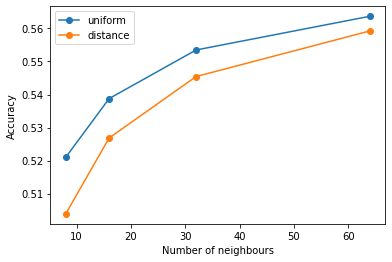

In [ ]:
cross_validator_knn = KFold(n_splits = 5, shuffle = True)
test_neighbors = [8,16,32,64]


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []

   for n_neighbors in test_neighbors:
       fold_accuracy = []
       knn_model = neighbors.KNeighborsClassifier(n_neighbors, weights = weights, p = 1)

       for train_fold, test_fold in cross_validator_knn.split(train_knn):
          # Random split into train and test
          f_train = train_knn.loc[train_fold]
          f_test = train_knn.loc[test_fold]

          # Training and execution of the model
          knn_model.fit(X = f_train.drop(['damage_grade'], axis = 1), y = f_train['damage_grade'])
          y_pred_knn = knn_model.predict(X = f_test.drop(['damage_grade'], axis = 1))

          # Model evaluation
          accuracy_knn = f1_score(f_test['damage_grade'], y_pred_knn, average='micro')
          fold_accuracy.append(accuracy_knn)

       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(test_neighbors, total_scores, marker = 'o', label = weights)
   print('Max value in ' + weights + ": " + str(max(total_scores)) + " (" + str(test_neighbors[np.argmax(total_scores)]) + ")")
   plt.xlabel('Number of neighbours')
   plt.ylabel('Accuracy')

plt.legend()
plt.show() 

From this graph, we can conclude that using `n_neighbors = 64`, we will achieve the best results, but that would end with the undesirable effect of overfitting, so we will be choosing 32, which seems a bit high, yet it provided the best results with empirically testing.

Regarding distance, we will be using the Manhattan one, as stated in the `p = 1` parameter; which provides the better results in the competition for this particular dataset.

### 5.2.3. Pre-evaluation

Now that we have a proper parametrization, we can pre-evaluate the model:

In [ ]:
# Constructor
n_neighbors = 32
weights = 'distance'
knn_model = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights, p = 1)

# Fitting and predicting
knn_model.fit(X = df_train_values[selected_features_knn], y = df_train_labels)
y_pred_knn = knn_model.predict(X = test_knn[selected_features_knn])
accuracy_knn = f1_score(test_knn['damage_grade'], y_pred_knn, average = 'micro')

print('Accuracy with F1 score:', accuracy_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy with F1 score: 0.9572204327957302


As we can see, the F1 score obtained is very high, but, unfortunately, it does not represent the actual score gotten in the competition. For better visual representation, we can print the confusion matrix.

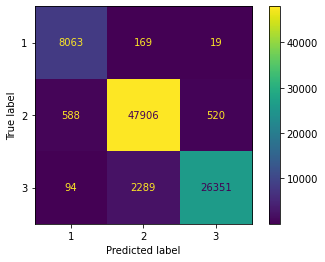

In [ ]:
confusion_matrix_knn = confusion_matrix(test_knn['damage_grade'], y_pred_knn)
display_cm_knn = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = knn_model.classes_)
display_cm_knn.plot()

It is clearly better than the one showed in Naive Bayes, since it starts predicting well the earthquakes of damage grade 3, and not misinterpreting them with grade 2. However, it is still it main weakness, where other wrong cells do not go above 600.

This model certainly is better than the previous one, so should ensure a higher score in the competition.

#### 5.2.3.1. Improved Model (1)

After using decision trees and obtaining the most important features, we can try to improve KNN using those:

In [ ]:
selected_features_knn_after_dt = ['geo_level_1_id',
                                  'geo_level_2_id',
                                  'geo_level_3_id',
                                  'foundation_type_r',
                                  'age',
                                  'area_percentage',
                                  'height_percentage',
                                  'has_superstructure_mud_mortar_stone',
                                  'ground_floor_type_v',
                                  'other_floor_type_q']

df_train_values_knn_after_dt = df_train_values_complete[selected_features_knn_after_dt]
df_train_values_knn_after_dt = df_train_values_knn_after_dt.join(df_train_labels)
train_knn_after_dt, test_knn_after_dt = train_test_split(df_train_values_knn_after_dt, test_size = 0.33)

And, after that, we can use the model again to predict the damage grade labels.

In [ ]:
# Constructor
n_neighbors = 32
weights = 'distance'
knn_model_after_dt = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights, p = 1)

# Fitting and predicting
knn_model_after_dt.fit(X = df_train_values_complete[selected_features_knn_after_dt], y = df_train_labels)
y_pred_knn_after_dt = knn_model_after_dt.predict(X = test_knn_after_dt[selected_features_knn_after_dt])
accuracy_knn_after_dt = f1_score(Y_test, y_pred_knn_after_dt, average = 'micro')

print('Accuracy with F1 score:', accuracy_knn_after_dt)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy with F1 score: 0.9574529936394609


We can observe how the F1 score went up, as the model improves a little bit with these new features. Now, we can print the confussion matrix:

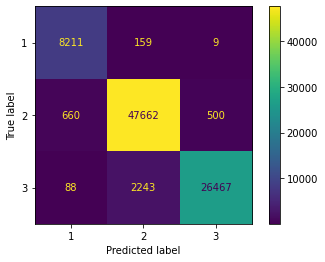

In [ ]:
confusion_matrix_knn = confusion_matrix(test_knn_after_dt['damage_grade'], y_pred_knn_after_dt)
display_cm_knn = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = knn_model.classes_)
display_cm_knn.plot()

While it looks similar to the previous one, the model gets some predictions better.

#### 5.2.3.2. Improved Model (2)

Another method to improve the accuracy of the model is to normalize the numerical features present:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

dataframe_to_normalize = df_train_values_complete[selected_features_knn_after_dt]

dataframe_to_normalize['geo_level_1_id'] = (dataframe_to_normalize['geo_level_1_id']-dataframe_to_normalize['geo_level_1_id'].min())/(dataframe_to_normalize['geo_level_1_id'].max()-dataframe_to_normalize['geo_level_1_id'].min())
dataframe_to_normalize['geo_level_2_id'] = (dataframe_to_normalize['geo_level_2_id']-dataframe_to_normalize['geo_level_2_id'].min())/(dataframe_to_normalize['geo_level_2_id'].max()-dataframe_to_normalize['geo_level_2_id'].min())
dataframe_to_normalize['geo_level_3_id'] = (dataframe_to_normalize['geo_level_3_id']-dataframe_to_normalize['geo_level_3_id'].min())/(dataframe_to_normalize['geo_level_3_id'].max()-dataframe_to_normalize['geo_level_3_id'].min())
dataframe_to_normalize['age'] = (dataframe_to_normalize['age']-dataframe_to_normalize['age'].min())/(dataframe_to_normalize['age'].max()-dataframe_to_normalize['age'].min())
dataframe_to_normalize['area_percentage'] = (dataframe_to_normalize['area_percentage']-dataframe_to_normalize['area_percentage'].min())/(dataframe_to_normalize['area_percentage'].max()-dataframe_to_normalize['area_percentage'].min())
dataframe_to_normalize['height_percentage'] = (dataframe_to_normalize['height_percentage']-dataframe_to_normalize['height_percentage'].min())/(dataframe_to_normalize['height_percentage'].max()-dataframe_to_normalize['height_percentage'].min())

df_train_values_knn_after_dt_normalized = dataframe_to_normalize
df_train_values_knn_after_dt_normalized

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,geo_level_1_id,geo_level_2_id,geo_level_3_id,foundation_type_r,age,area_percentage,height_percentage,has_superstructure_mud_mortar_stone,ground_floor_type_v,other_floor_type_q
building_id,,,,,,,,,,
802906,0.200000,0.341275,0.970637,1,0.030151,0.050505,0.100000,1,0,1
28830,0.266667,0.630694,0.223761,1,0.010050,0.070707,0.166667,1,0,1
94947,0.700000,0.254380,0.714013,1,0.010050,0.040404,0.100000,1,0,0
590882,0.733333,0.292922,0.850959,1,0.010050,0.050505,0.100000,1,0,0
201944,0.366667,0.091801,0.118405,1,0.030151,0.070707,0.233333,0,0,0
...,...,...,...,...,...,...,...,...,...,...
688636,0.833333,0.935529,0.128989,1,0.055276,0.050505,0.033333,1,0,0
669485,0.566667,0.501051,0.163921,1,0.000000,0.050505,0.100000,1,0,1
602512,0.566667,0.035739,0.649558,1,0.055276,0.050505,0.166667,1,0,1


And now, we can again implement the model to get the predictions:

In [ ]:
df_train_values_knn_after_dt_normalized = df_train_values_knn_after_dt_normalized.join(df_train_labels)
train_knn_after_dt_normalized, test_knn_after_dt_normalized = train_test_split(df_train_values_knn_after_dt_normalized, test_size = 0.33)

In [ ]:
# Constructor
n_neighbors = 32
weights = 'distance'
knn_model_after_dt_normalized = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights, p = 1)

# Fitting and predicting
knn_model_after_dt_normalized.fit(X = df_train_values_knn_after_dt_normalized[selected_features_knn_after_dt], y = df_train_labels)
y_pred_knn_after_dt_normalized = knn_model_after_dt_normalized.predict(X = test_knn_after_dt_normalized[selected_features_knn_after_dt])
accuracy_knn_after_dt_normalized = f1_score(test_knn_after_dt_normalized['damage_grade'], y_pred_knn_after_dt_normalized, average = 'micro')

print('Accuracy with F1 score:', accuracy_knn_after_dt_normalized)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy with F1 score: 0.957778578820684


And we can print the confussion matrix again:

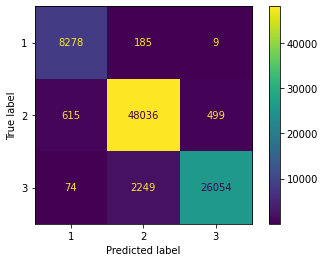

In [ ]:
confusion_matrix_knn = confusion_matrix(test_knn_after_dt_normalized['damage_grade'], y_pred_knn_after_dt_normalized)
display_cm_knn = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = knn_model.classes_)
display_cm_knn.plot()

Again, it is similar to the previous ones, so the result in the competition will make the difference.

### 5.2.4. Preparing the submission

Just like before, we need to repeat the necessary steps to submit the predictions from this model to the competition page.

In [ ]:
# Apply feature reduction
test_values_subset_knn = pd.get_dummies(test_values)
test_values_subset_knn = test_values_subset_knn[selected_features_knn_after_dt]

# Normalization
test_values_subset_knn['geo_level_1_id'] = (test_values_subset_knn['geo_level_1_id']-test_values_subset_knn['geo_level_1_id'].min())/(test_values_subset_knn['geo_level_1_id'].max()-test_values_subset_knn['geo_level_1_id'].min())
test_values_subset_knn['geo_level_2_id'] = (test_values_subset_knn['geo_level_2_id']-test_values_subset_knn['geo_level_2_id'].min())/(test_values_subset_knn['geo_level_2_id'].max()-test_values_subset_knn['geo_level_2_id'].min())
test_values_subset_knn['geo_level_3_id'] = (test_values_subset_knn['geo_level_3_id']-test_values_subset_knn['geo_level_3_id'].min())/(test_values_subset_knn['geo_level_3_id'].max()-test_values_subset_knn['geo_level_3_id'].min())
test_values_subset_knn['age'] = (test_values_subset_knn['age']-test_values_subset_knn['age'].min())/(test_values_subset_knn['age'].max()-test_values_subset_knn['age'].min())
test_values_subset_knn['area_percentage'] = (test_values_subset_knn['area_percentage']-test_values_subset_knn['area_percentage'].min())/(test_values_subset_knn['area_percentage'].max()-test_values_subset_knn['area_percentage'].min())
test_values_subset_knn['height_percentage'] = (test_values_subset_knn['height_percentage']-test_values_subset_knn['height_percentage'].min())/(test_values_subset_knn['height_percentage'].max()-test_values_subset_knn['height_percentage'].min())

# Obtain the predictions
predictions = knn_model_after_dt_normalized.predict(test_values_subset_knn)

# Create the submission file
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns, # Only one column: 'damage_grade' 
                             index=submission_format.index)
my_submission.to_csv('knn_submission_baseline.csv')

The submitted file obtained a score of `0.7215`, ranked `#995`.

Refer to section 5.4 for a comparison to the other baseline techniques.

## 5.3. Decision Trees

In order to complete our baseline, we'll be trying to accomplish two goals within this section.
1. A baseline classification model using DTs
2. Feature selection using DTs.

The results of the feature selection, regardless of the success of the DT classifier, will be used within the upcoming optimization steps.

### 5.3.1. Preparations

The training and testing data for our initial model underwent a feature-selection step using domain knowledge in the first attempt of creating a model for DTs. From the feedback we received, we've changed this and don't perform a feature selection step, since DTs are really good at determining the most important features.

By doing this, we were able to see, that we previously missed an important feature, as explained in more detail in the sections down below.

We proceed by creating our full training dataset as `X_train`, `Y_train`, `X_test` and `Y_test`.

In [ ]:
# feature selection using domain knowledge (deprecated, don't filter anymore)
"""
selected_features_domain_dt = ['age',
                         'area_percentage',
                         'height_percentage',
                         'geo_level_1_id',
                         'geo_level_2_id',
                         'geo_level_3_id',
                         'has_superstructure_adobe_mud',
                         'has_superstructure_mud_mortar_stone',
                         'has_superstructure_stone_flag',
                         'has_superstructure_cement_mortar_stone',
                         'has_superstructure_mud_mortar_brick',
                         'has_superstructure_cement_mortar_brick',
                         'has_superstructure_timber',
                         'has_superstructure_bamboo',
                         'has_superstructure_rc_non_engineered',
                         'has_superstructure_rc_engineered',
                         'has_superstructure_other']
"""


# initial dataset (all columns, with categorical features normalized)
df_train_values_dt = df_train_values_complete.copy()

# include label in to data frame
df_train_values_dt = df_train_values_dt.join(df_train_labels)

# split into training and testing data frame
train_dt, test_dt = train_test_split(df_train_values_dt, test_size = 0.33)

# output dimensions
for df in [train_dt, test_dt]:
  print(df.shape)

(174602, 69)
(85999, 69)


Also, we need to install and import some libraries specific for this task.

In [ ]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

from IPython.display import Image
from io import StringIO

import matplotlib.pyplot as plt    

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

### 5.3.2. Initial Model

In order to establish a baseline for the DT classifier algorithm, a model will be trained using the training data without any adjustments to the parameters.

In [ ]:
# split joined data frame into X,y
X_train = train_dt.drop(['damage_grade'], axis=1)
y_train = train_dt['damage_grade']
X_test = test_dt.drop(['damage_grade'], axis=1)
y_test = test_dt['damage_grade']

# training the model
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

# predicting the labels of the test split
y_pred_dt = dt_model.predict(X_test)

# F1-score
f1 = f1_score(y_test, y_pred_dt, average='micro')
print('F1 score: ' + '{:10.4f}'.format(f1))

F1 score:     0.6545


Already, this is quite an acceptable result if we keep in mind that no adjustments to the parameters were made. 

The feature selection based on domain knowledge also does not seem to impact the F1 score in a significant way: In an earlier attempt, in which the feature selection process has been omitted (model trained using all features), the F1 score reached a value of about `0.65`. 

Due to the large amount of features within the DT, a visualization of the tree does not make sense here (and takes a long time to complete).

Therefore, we'll improve our model first by picking good parameters first. This will then allow us to do the feature selection and therefore a simplified visualization of our DT.

### 5.3.3. Parametrization

As we've seen within the "trading" colab example, we can initialize the DT classifier using the parameters `max_depth`, `criterion`, `min_samples_split`, `min_samples_leaf`, as well as `class_weight`. 

We test different values for these parameters to maximize the obtained accuracy. More specifically, we'll be taking a look at the values for `max_depth`, `criterion` and `class_weight`. Notice, that we specify the class weight in accordance to the unbalanced labels seen in the exploratory data analysis: `1:5, 2:30, 3:18`.

Working on gini, depth = 39/40


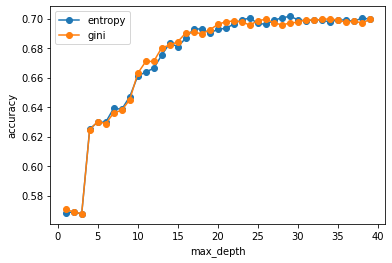

In [ ]:
max_attributes = len(list(df_train_values_dt))
# max_depth = max_attributes * 2 # 138 in this case
max_depth = 40 # saves time - the score stagnates for depth_range > 25

# test both possible criterion arguments
for criterion in ["entropy", "gini"]:
  accuracies = list()

  # test possible depth ranges
  for depth in range(1, max_depth):
      # console prints on the status of the execution
      output.clear()
      print("Working on " + str(criterion) + ", " + "depth = " + str(depth) + "/" + str(max_depth ))

      # initialize classifier with parameters for this instance
      dt_model = DecisionTreeClassifier(criterion=criterion, 
                                        min_samples_split = 65, 
                                        min_samples_leaf = 20,
                                        max_depth = depth,
                                        class_weight={1:5, 2:30, 3:18})

      # split into training and testing data frame
      train_dt, test_dt = train_test_split(df_train_values_dt, test_size = 0.33)

      # split joined data frame into X,y
      X_train = train_dt.drop(['damage_grade'], axis=1)
      y_train = train_dt['damage_grade']
      X_test = test_dt.drop(['damage_grade'], axis=1)
      y_test = test_dt['damage_grade']

      # train model
      dt_model.fit(X_train, y_train)

      # measure accuracy
      score = dt_model.score(X = X_test, y = y_test)

      accuracies.append(score)

  plt.plot(range(1, max_depth), accuracies, marker='o', label=criterion)

plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

We can observe two interesting points from the graph.

1. The choice of the `criterion` parameter does not seem to make a huge difference for this dataset. As an arbitrary decision, we will be choosing the parameter `entropy`.
2. More relaxed restrictions for the maximum depth of the tree `max_depth` do not seem to affect the score for values greater than around 22. Therefore, we choose the value `22` for this parameter.

#### 5.3.3.1. Improved Model (1)

With the newly found parameters for our classifier, we can repeat the evaluations and compare them to the results of the initial model. To recap, we found the following parameters to yield good accuracies:
* `class_weight` = *{1:5, 2:30, 3:18}*
* `criterion` = *entropy*
* `max_depth` = *22*

In [ ]:
# split joined data frame into X,y
X_train = train_dt.drop(['damage_grade'], axis=1)
y_train = train_dt['damage_grade']
X_test = test_dt.drop(['damage_grade'], axis=1)
y_test = test_dt['damage_grade']

# training the model
dt_model = DecisionTreeClassifier(criterion="entropy", 
                                  max_depth = 22, 
                                  class_weight={1:5, 2:30, 3:18})
dt_model.fit(X_train, y_train)

# predicting the labels of the test split
y_pred_dt = dt_model.predict(X_test)

# F1-score
f1 = f1_score(y_test, y_pred_dt, average='micro')
print('F1 score: ' + '{:10.4f}'.format(f1))

F1 score:     0.6786


We manage to improve the F1 score of our classifier by a noticable amount.

#### 5.4.3.2. Improved Model (2)

As mentioned above, we've not taken a detailed look into the parameters `min_samples_split` and `min_samples_leaf`. However, using the parameters `60` and `20` already defined in the "tuning" section of the "trading" colab, we're able to improve the F1 score even further.

Upon playing around with these values we can not observe a further improvement of the F1 score.

In summary, we use the following parameters to yield good results:

* `class_weight` = *{1:5, 2:30, 3:18}*
* `criterion` = *entropy*
* `max_depth` = *22*
* `min_samples_split` = *60*
* `min_samples_leaf` = *20*

In [ ]:
# split joined data frame into X,y
X_train = train_dt.drop(['damage_grade'], axis=1)
y_train = train_dt['damage_grade']
X_test = test_dt.drop(['damage_grade'], axis=1)
y_test = test_dt['damage_grade']

# training the model
dt_model = DecisionTreeClassifier(criterion="entropy", 
                                  max_depth = 22, 
                                  class_weight={1:5, 2:30, 3:18},
                                  min_samples_split = 60, 
                                  min_samples_leaf = 20)
dt_model.fit(X_train, y_train)

# predicting the labels of the test split
y_pred_dt = dt_model.predict(X_test)

# F1-score
f1 = f1_score(y_test, y_pred_dt, average='micro')
print('F1 score: ' + '{:10.4f}'.format(f1))

F1 score:     0.6958


This adjustment increases the F1 score of our model once more.

### 5.3.4. Summary: DT Classifier Model

Using Parametrization, we were able to achieve the following improvements to our model. As the following table shows, the parametrization steps didn't yield improvements as large as the parametrization steps of the NB or KNN classifiers. However, we'll still be able to use the findings of this classifier to improve the performance of NB and KNN.

| **Classifier version** | **F1 Score** |
|:--------------:|:-------------------:|
|   No Parameters, Initial Model  |        0.6528       |
|   With Parametrization, Step 1  |        0.6772       |
|   With Parametrization, Step 2  |        0.6966       |

The confusion matrix below shows the classifications of the trained model with parametrization, step 2.

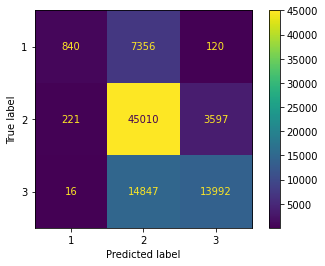

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot()

### 5.3.5. Preparing the submission

Just like before, we need to repeat the necessary steps to submit the predictions from this model to the competition page.

In [ ]:
# normalize test features the same way as the training data
test_values_dt = pd.get_dummies(test_values)
test_values_dt

# obtain the predictions
predictions = dt_model.predict(test_values_dt)

# create the submission file
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns, # only one column: 'damage_grade' 
                             index=submission_format.index)
my_submission.to_csv('dt_submission_baseline.csv')

The submitted file obtained a score of `0.6910`, ranked `#1275`. 

Refer to section 5.4 for a comparison to the other baseline techniques.

### 5.3.6. Feature Selection using DTs

The lower the depth of a decision in the decision tree, the more information we are able to retrieve from it. This information has been learned by the DT classification algorithm, so we are able to extract it for feature selection purposes.

In [ ]:
dt_feature_importance = pd.DataFrame(
    {'Feature':     test_values_dt.columns,         # all features
     'Importance':  dt_model.feature_importances_}  # importance value retrieved from DT classifier [0..1]
)

sorted_importances = dt_feature_importance.sort_values("Importance", ascending=False)
sorted_importances[:10]

,Feature,Importance
0,geo_level_1_id,0.367763
1,geo_level_2_id,0.199243
35,foundation_type_r,0.094589
2,geo_level_3_id,0.091252
4,age,0.037217
5,area_percentage,0.035825
6,height_percentage,0.023004
8,has_superstructure_mud_mortar_stone,0.015682
43,ground_floor_type_v,0.014237
12,has_superstructure_cement_mortar_brick,0.011208


In [ ]:
import plotly.express as px

px.bar(
    x = sorted_importances[:20]['Feature'], 
    y = sorted_importances[:20]['Importance'], 
    labels = {"x": "Feature Name", "y": "Feature Importance"},
    width = 1000, height = 600
)

According to our DT classifier, the most important features are the following:
* `geo_level_1_id`: ID of general geographic region
* `geo_level_2_id`: ID of geographic sub-region
* `geo_level_3_id`: ID of specific geographic sub-region
* `foundation_type_r`: flag, if type of foundation used while building is equal to "r"
* `area_percentage`: normalized area of the building footprint.
* `age`: age of building in years
* `height_percentage`: normalized height of the building footprint

These seven features describe more than x % of the importance.


In [ ]:
selected_features_classifier_dt =  ["geo_level_1_id", 
                                    "geo_level_2_id", 
                                    "geo_level_3_id",
                                    "foundation_type_r", 
                                    "area_percentage", 
                                    "age", 
                                    "height_percentage"]

# collects the importance value for each selected entry in the dataframe
described_importance = sum(row["Importance"] for row in dt_feature_importance.to_dict('records') if row["Feature"] in selected_features_classifier_dt)

print('{:10.4f}'.format(described_importance * 100) + "%")

   84.8894%


As we can see, there are some features that were not considered in the initial feature selection. We tried the features coming from the decision tree and the results are the following ones:

- Naive-Bayes: adding the categorical variable foundation_type (which has a decent relevance according to the decision tree), after normalizing it with one hot encoding we get a f1-score of 0.4973, which is worse than the original value (thus we will stick to our initial feature selection).

### 5.3.7. Visualization

As discussed in section 5.3.2 (Initial Model), we weren't able to visualize the decision tree before due to the high number of features. This is now possible. In order to meet the parameters to be fed into the visualization code, we re-run the classification process, but only including the newly-picked features.

Also, in order to fit the visualization onto the screen (barely), we adjust the `max_depth` value to 7, the number of features. 

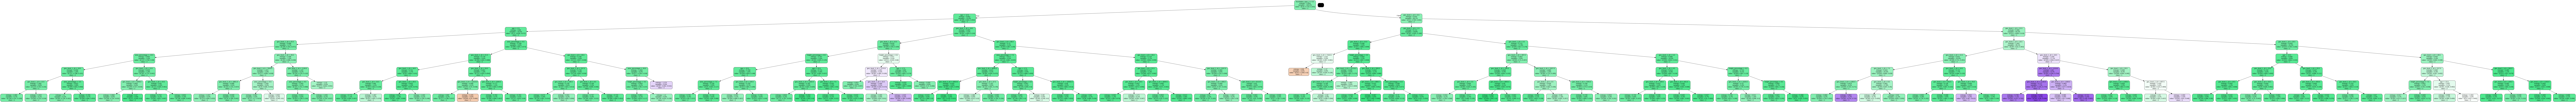

In [ ]:
# initial dataset (all columns, with categorical features normalized)
df_train_values_dt = df_train_values_complete.copy()

# filters initial dataset for newly selected features
df_train_values_dt = df_train_values_dt[selected_features_classifier_dt]

# include label in to data frame
df_train_values_dt = df_train_values_dt.join(df_train_labels)

# split into training and testing data frame
train_dt, test_dt = train_test_split(df_train_values_dt, test_size = 0.33)

# split joined data frame into X,y
X_train = train_dt.drop(['damage_grade'], axis=1)
y_train = train_dt['damage_grade']
X_test = test_dt.drop(['damage_grade'], axis=1)
y_test = test_dt['damage_grade']

# training the model
dt_model = DecisionTreeClassifier(criterion="entropy", 
                                  max_depth = 7, 
                                  class_weight={1:5, 2:30, 3:18},
                                  min_samples_split = 60, 
                                  min_samples_leaf = 20)
dt_model.fit(X_train, y_train)

# predicting the labels of the test split
y_pred_dt = dt_model.predict(X_test)

# visualization routine
dot_data = StringIO()

tree.export_graphviz(dt_model, out_file = dot_data, proportion = True,
                     feature_names=list(X_train), 
                     class_names = ['1', '2', '3'], rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png(), width=10000, height=363, unconfined=True) # click on the image to scroll

Given the complexity of the problem, this decision tree provides a suprisingly easy to understand representation of the classification.

## 5.4. Competition Results

The following table shows the best achieved results using the baseline techniques, including the ranking within the competition. These values were obtained by uploading the respective submission files onto the competition website.


| **Model used** | **Score obtained** | **Ranking** |
|:--------------:|:-------------------:|:-----------:|
|   BernoulliNB  |        0.5665       |     1561    |
|   KNN  |        0.7215       |     995    |
|   DT  |        0.6910       |     1275    |

# 6. Obtaining information from variable relationships

Additionally, we want to understand more the data that we are given. It is for this reason that we decided to essentially calculate a contingency table to know the relationship between the different variables, so as to hopefully obtain valuable information to improve our solution in the final version. 

In [ ]:
contingency = pd.crosstab(index=df_train_values_subset['geo_level_1_id'],
            columns=df_train_labels['damage_grade'], margins=True)
px.bar(contingency)

Looking at the graph, we can see how the indexes of `geo_level_1_id` do not show geographical coherence, that is, the numbers are not next or near to each other, which could help determining the damage grade of buildings that are really close or really far away (choosing labels 1 and 3 over label 2 could have to do with this).

